# Graveyard Of Wikidata - Cluster

Github : https://github.com/haikelJebahi/Graveyard-of-wikidata

Data : https://iccl.inf.tu-dresden.de/web/Wikidata_SPARQL_Logs/en

## Imports

In [17]:
%matplotlib inline
from joblib import dump, load
import pandas as pd
import matplotlib.pyplot as plt
import re
from urllib.parse import unquote_plus
from collections import Counter
import seaborn as sns
from sklearn.cluster import KMeans
import colorcet as cc
from sklearn.cluster import AgglomerativeClustering

#import Query2Vec

In [18]:
pd.set_option("display.max_rows", 0)
pd.set_option("display.max_columns", 0)
pd.set_option("display.expand_frame_repr", True)
pd.set_option("display.max_colwidth", -1)

/var/folders/lm/zh_hww991gd26t0d10kfp2km0000gn/T/ipykernel_79056/3536214460.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [19]:
# see parse.py
def encoded2raw(encoded):
    str = unquote_plus(encoded)
    str = re.sub(r"> *\*", ">*", str)
    str = re.sub(r"> *\+", ">+", str)
    str = re.sub(r"> *\?([^v])", r">?\1", str)
    return str


## Analyse with PCA/TSNE

In [20]:


features = load("../data/pca/pca_features.joblib")
df_sample = pd.read_csv("../data/sample/status500_Joined.parsed.sample.tsv", sep="\t")
tsne_2_results = load("../data/tsne/tsne.joblib")

In [21]:
%%script false --no-raise-error # disable cell

features = load("../data/pca/pca_features.noduplicate.joblib")
df_sample = pd.read_csv("../data/sample/status500_Joined.parsed.noduplicate.sample.tsv", sep="\t")
tsne_2_results = load("../data/tsne/tsne.noduplicate.joblib")

In [22]:
len(df_sample)

122832

### Kmeans clustering

In [23]:
kmeans = dict()
distortions = []

for i in range(1,20):
    print("Clustering for n_clusters=" + str(i))
    kmeans[i] = KMeans(n_clusters=i, random_state=0).fit(tsne_2_results)
    distortions.append(kmeans[i].inertia_)


Clustering for n_clusters=1
Clustering for n_clusters=2
Clustering for n_clusters=3
Clustering for n_clusters=4
Clustering for n_clusters=5
Clustering for n_clusters=6
Clustering for n_clusters=7
Clustering for n_clusters=8
Clustering for n_clusters=9
Clustering for n_clusters=10
Clustering for n_clusters=11
Clustering for n_clusters=12
Clustering for n_clusters=13
Clustering for n_clusters=14
Clustering for n_clusters=15
Clustering for n_clusters=16
Clustering for n_clusters=17
Clustering for n_clusters=18
Clustering for n_clusters=19


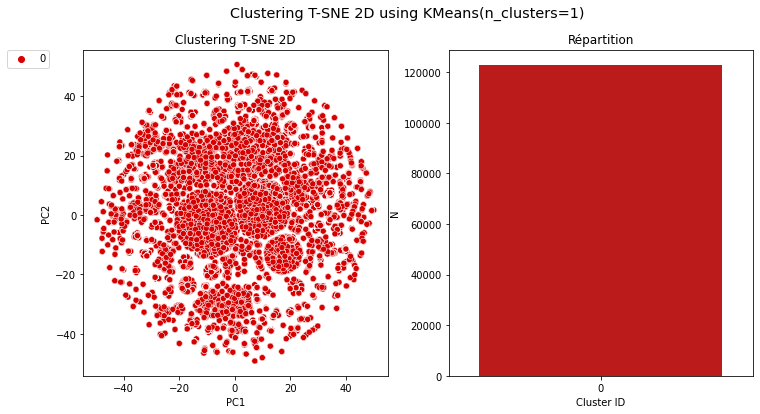

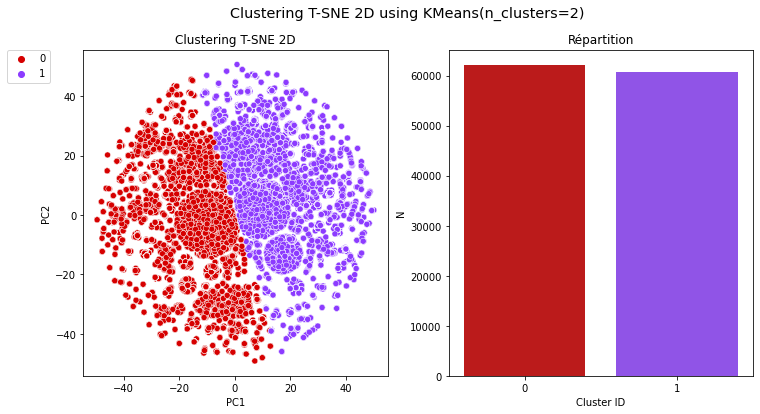

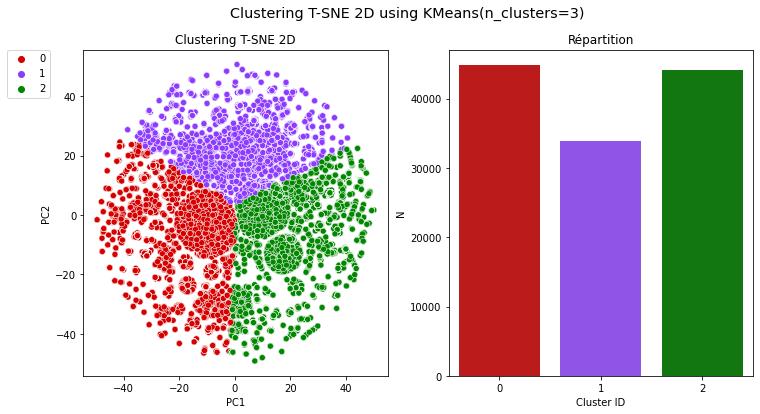

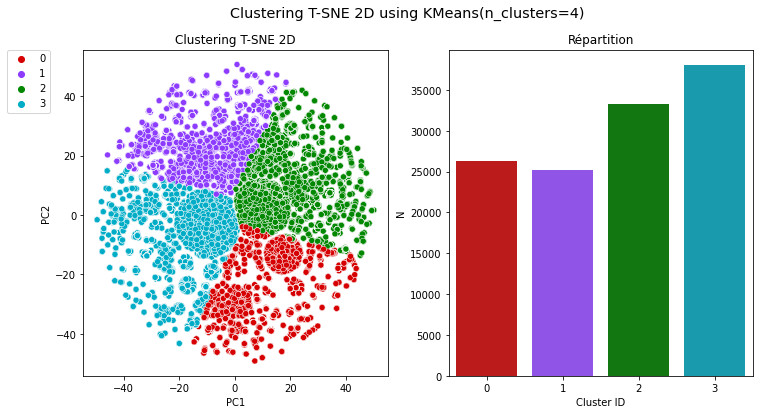

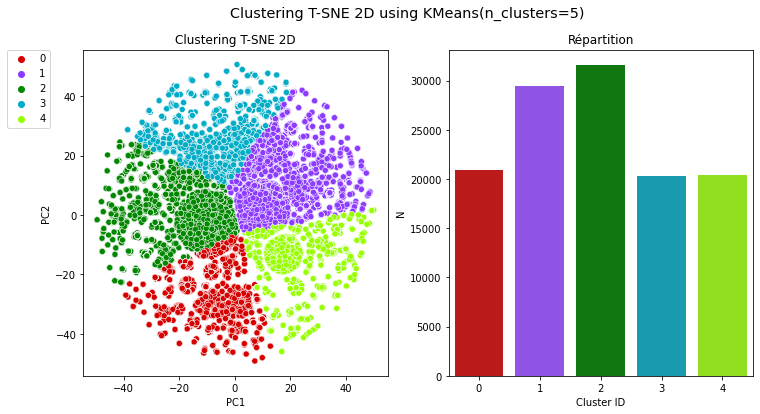

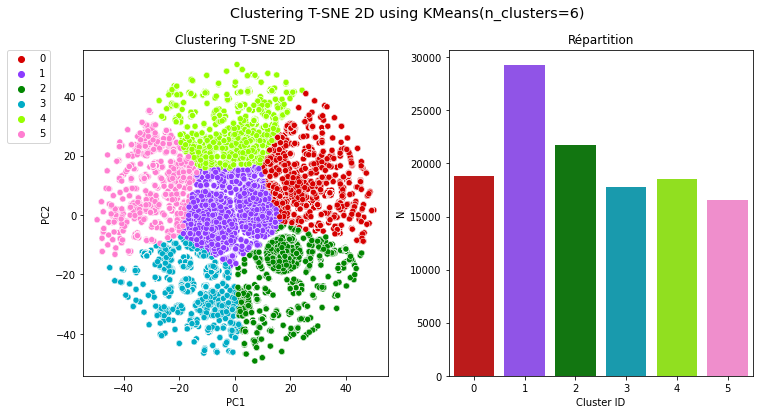

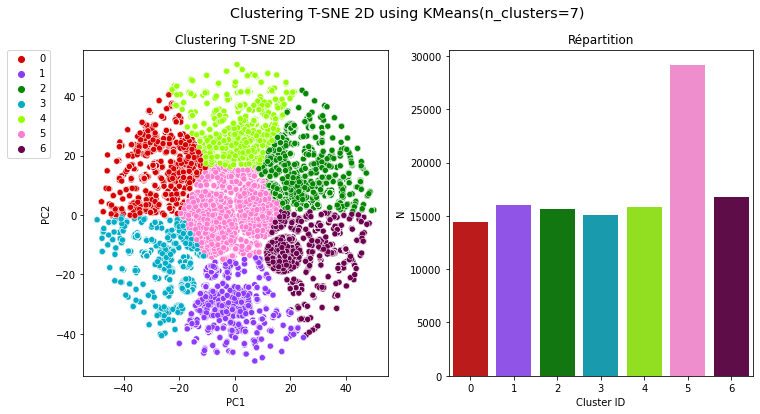

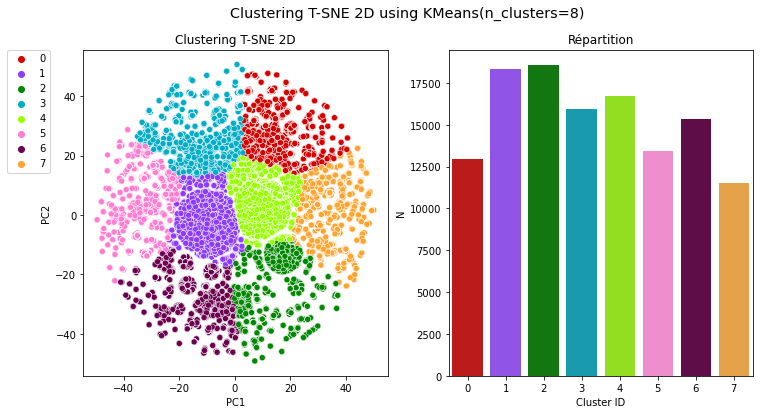

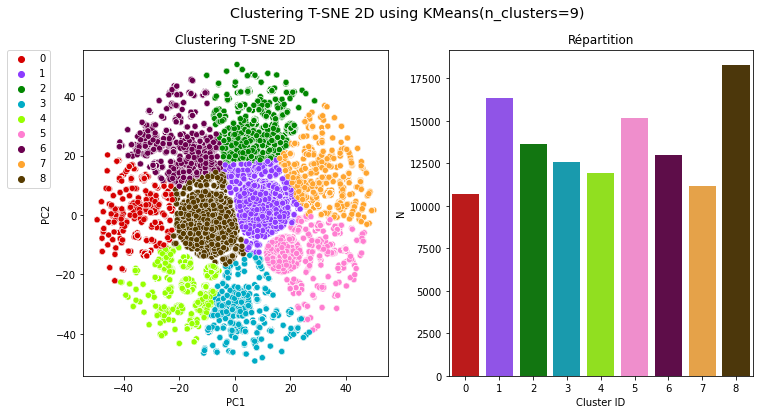

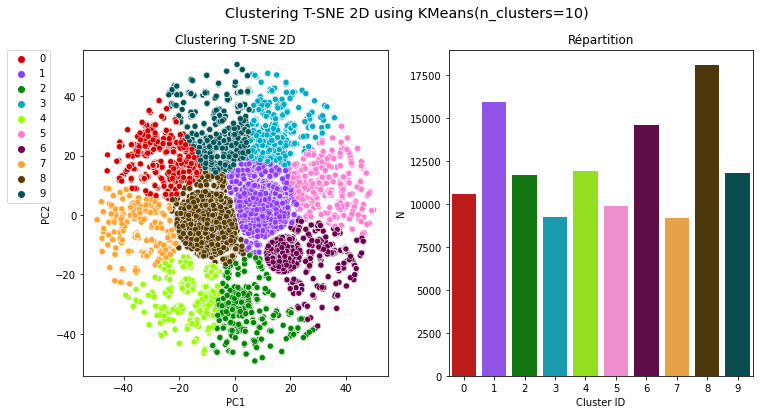

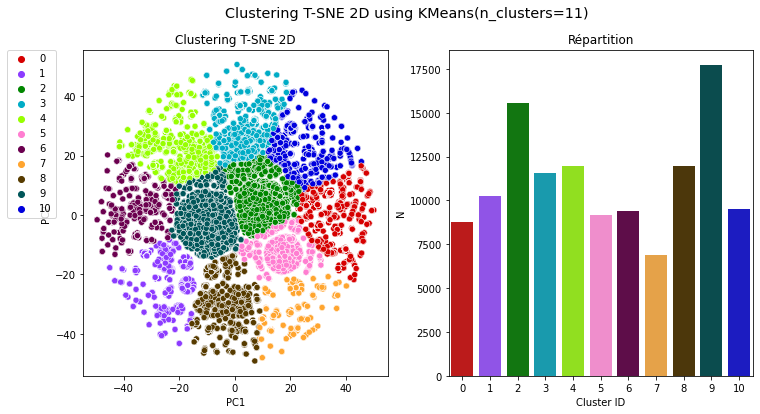

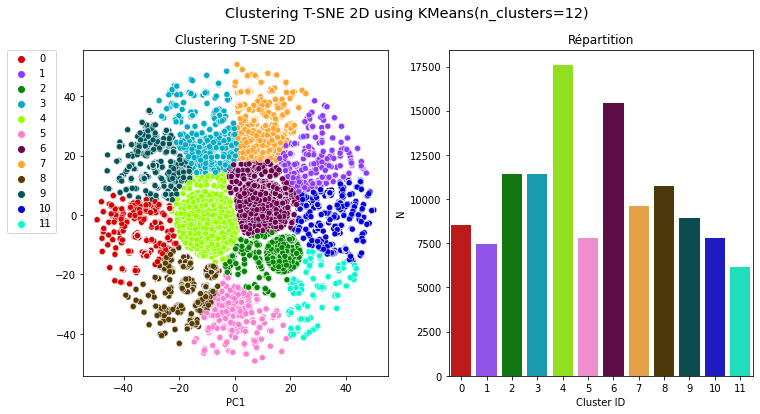

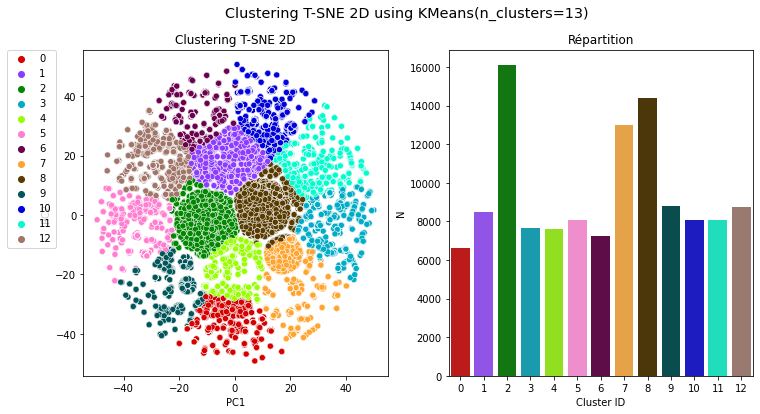

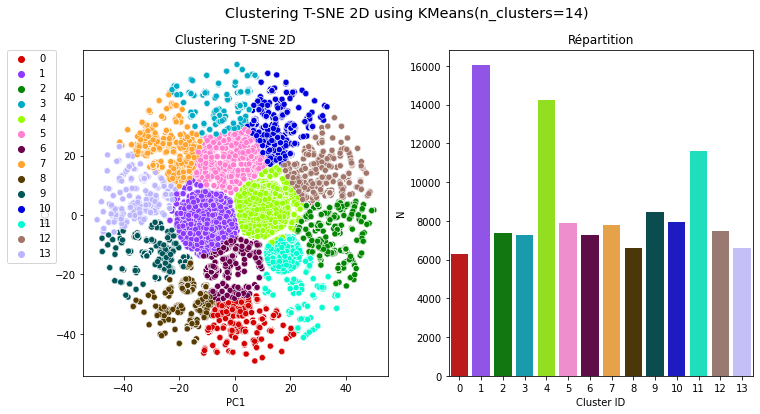

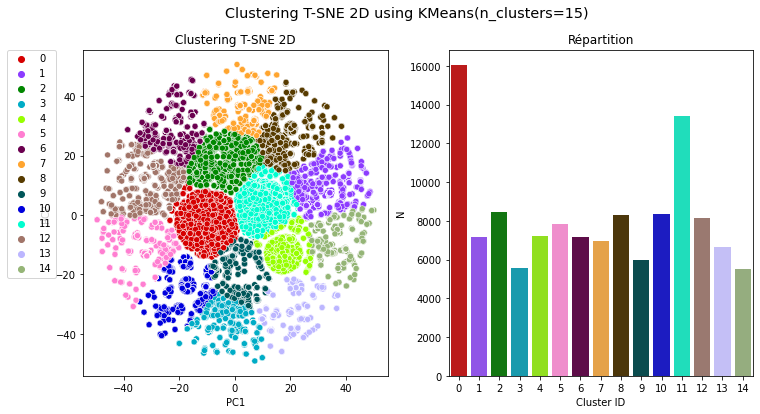

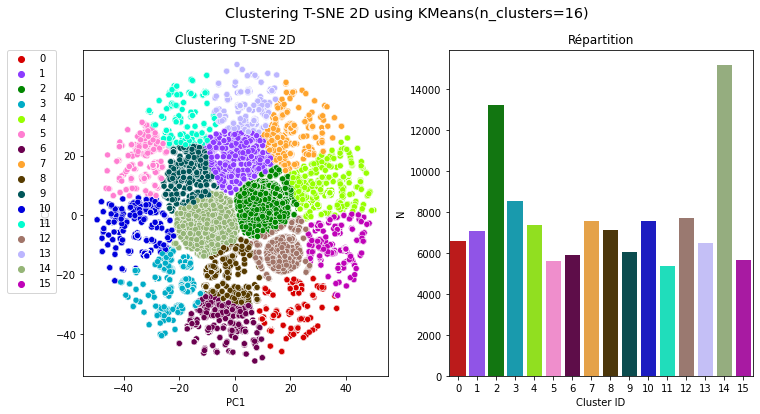


KeyboardInterrupt



In [24]:
for keys in kmeans.keys():
    labels = kmeans[keys].labels_
    counter = Counter(labels)

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    # Plot title
    st = fig.suptitle("Clustering T-SNE 2D using KMeans(n_clusters=" + str(keys) + ")", fontsize="x-large")
    palette = sns.color_palette(cc.glasbey, n_colors=len(counter.keys()))

    # Scatterplot
    sns\
        .scatterplot(x=tsne_2_results[:, 0], y=tsne_2_results[:, 1], hue=labels.astype(int), ax=ax1,legend='full', palette=palette)\
        .set(title="Clustering T-SNE 2D", xlabel="PC1", ylabel="PC2")
    ax1.legend(bbox_to_anchor=(-0.25, 1), loc=2, borderaxespad=0.)

    # Bar plot
    sns\
        .barplot(x=list(counter.keys()), y=list(counter.values()), ax=ax2,  palette=palette)\
        .set(title="Répartition", xlabel="Cluster ID", ylabel="N")
    
    # show
    plt.show()

### Parallel Coordinates Plot

Add cluster to dataframe

In [ ]:
labels = kmeans[14].labels_ # <-- change me

df_sample_with_cluster = df_sample.copy()
df_sample_with_cluster["cluster_id"] = labels
df_sample_with_cluster

##### Per query

group by cluster

In [ ]:
dict_df_by_cluster = dict()
cluster_ids = df_sample_with_cluster["cluster_id"].unique()

for cluster_id in cluster_ids:
    dict_df_by_cluster[cluster_id] = df_sample_with_cluster[df_sample_with_cluster["cluster_id"]==cluster_id]

In [ ]:
n_query_per_cluster = 2

for cluster_id in dict_df_by_cluster.keys():
    subset = dict_df_by_cluster[cluster_id].sample(n=n_query_per_cluster, random_state=0, replace=True)
    for index, row in subset.iterrows():
        print("Cluster ID  = " + str(cluster_id) + ", index = " + str(index))
        print("---- QUERY BEGIN ----")
        print(encoded2raw(row["anonymizedQuery"]))
        print("---- QUERY END ----")
        print()

## Parallel Coordinates Plot

In [ ]:
features

##### Plot

In [1]:

plt.figure(figsize=(16,8))
plt.plot(kmeans.keys(), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

NameError: name 'plt' is not defined

Calculate color palette

In [ ]:
n_colors = df_sample_with_cluster["cluster_id"].max() + 1
palette = sns.color_palette(cc.glasbey, n_colors=n_colors)

Plot

In [ ]:

plt.figure(figsize=(16,8))
plt.plot(kmeans.keys(), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

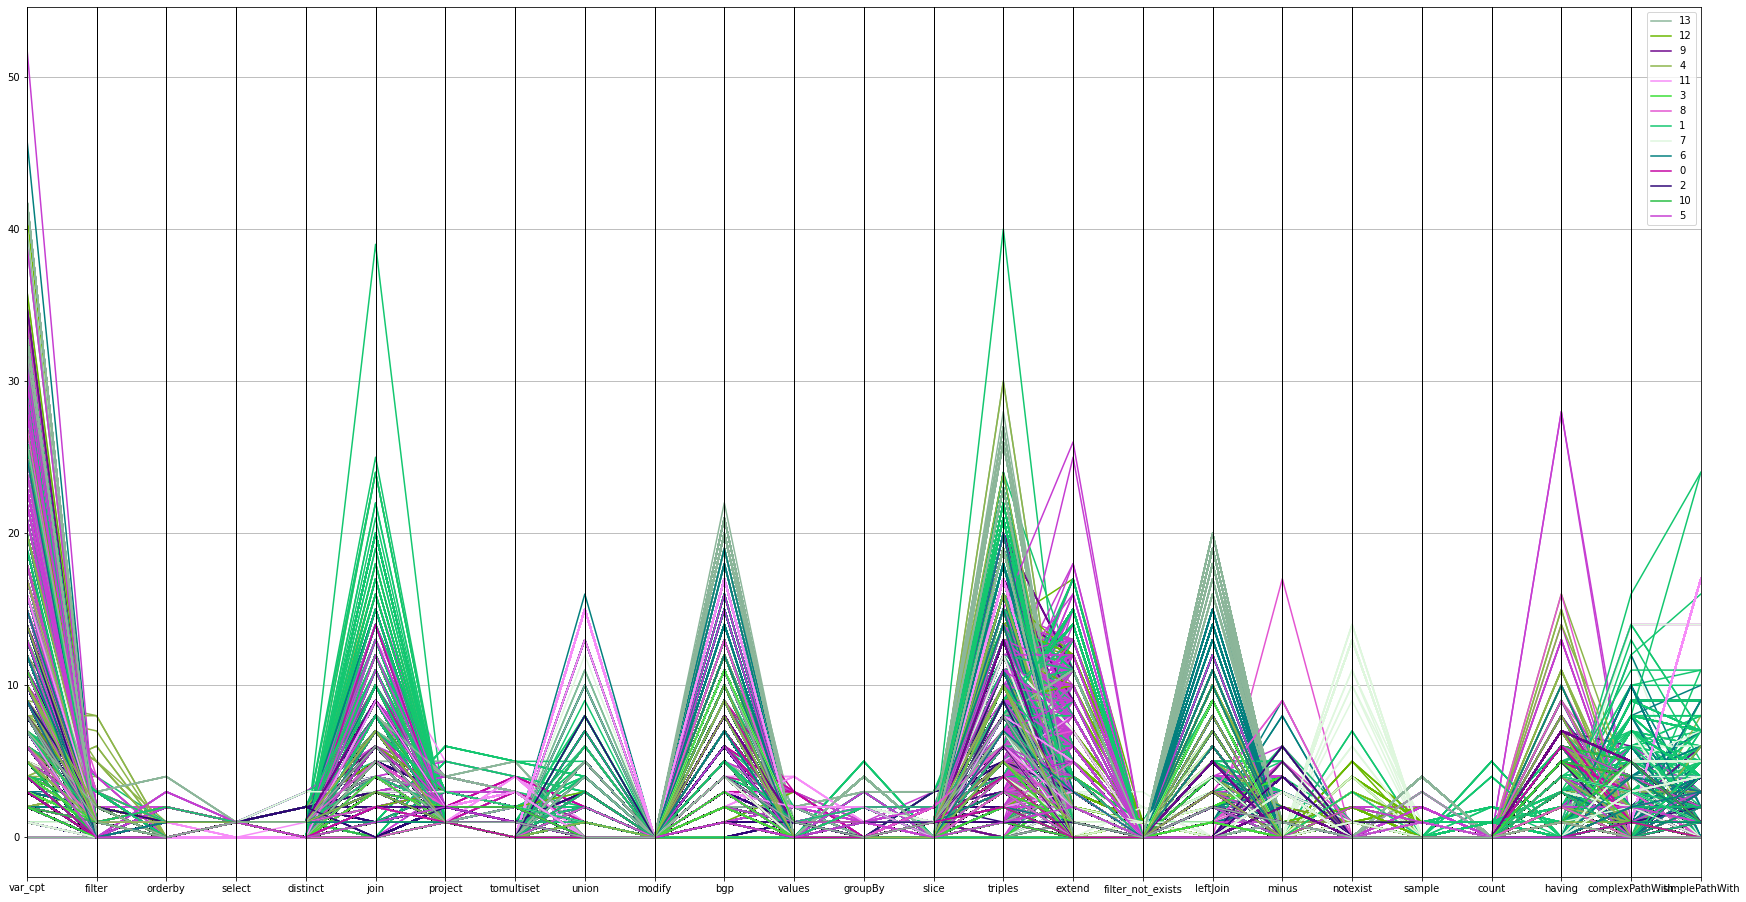

In [ ]:
plt.figure(figsize=(30, 16))
pd.plotting.parallel_coordinates(
    df_sample_with_cluster[
        [
            "var_cpt",
            "filter",
            "orderby",
            "select",
            "distinct",
            "join",
            "project",
            "tomultiset",
            "union",
            "modify",
            "bgp",
            "values",
            "groupBy",
            "slice",
            "triples",
            "extend",
            "filter_not_exists",
            "leftJoin",
            "minus",
            "notexist",
            "sample",
            "count",
            "having",
            "complexPathWith",
            "simplePathWith",
        ]
        + ["cluster_id"]
    ],
    "cluster_id",
)


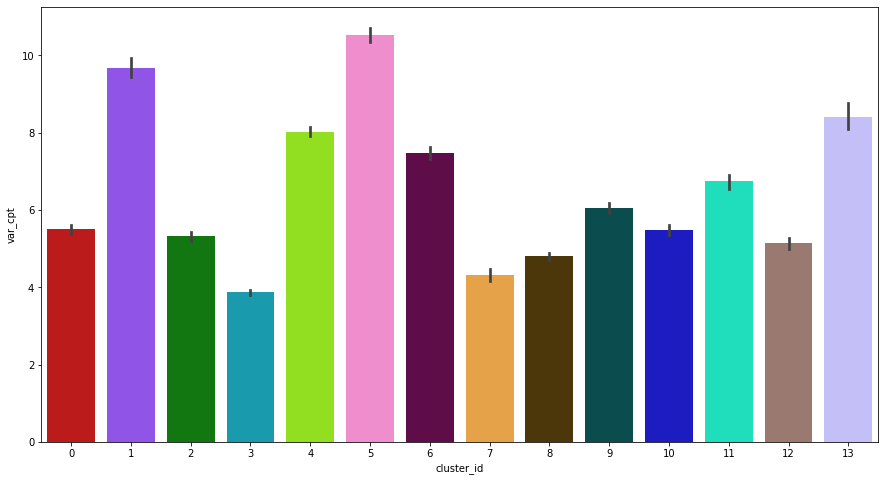

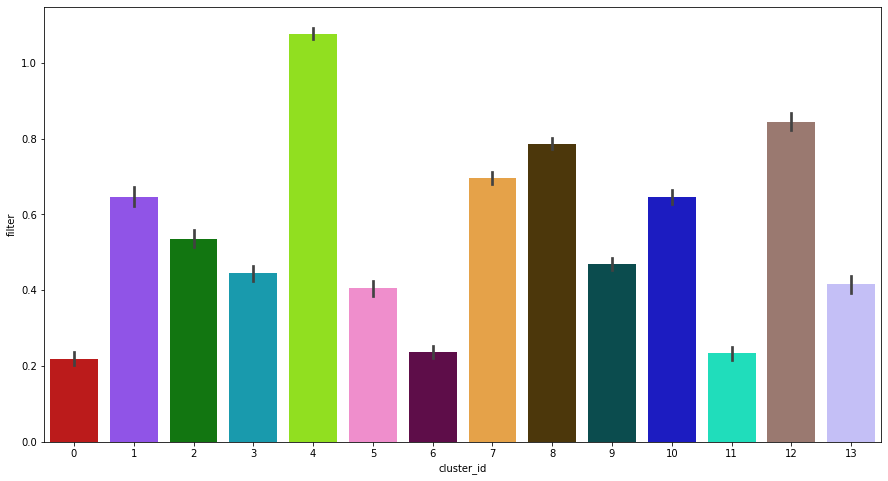

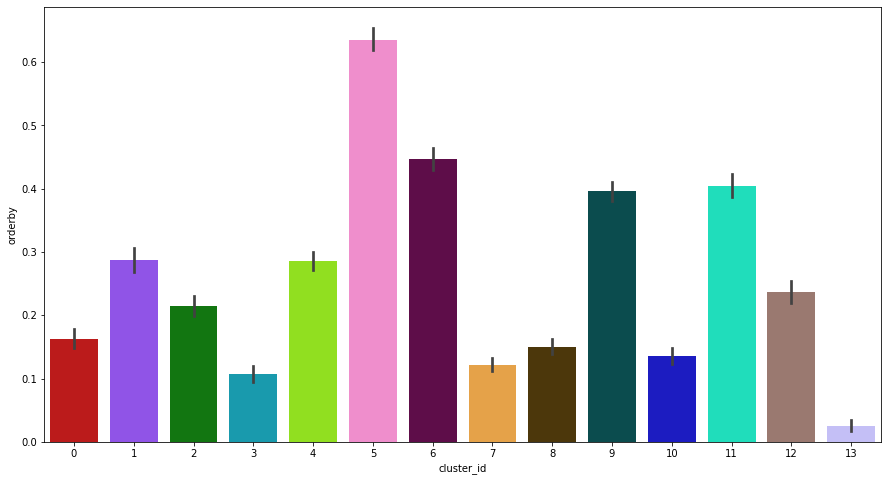

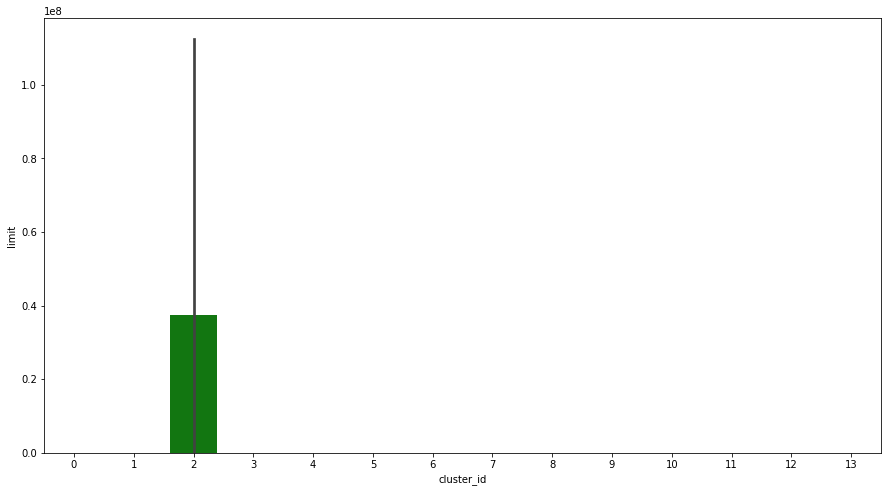

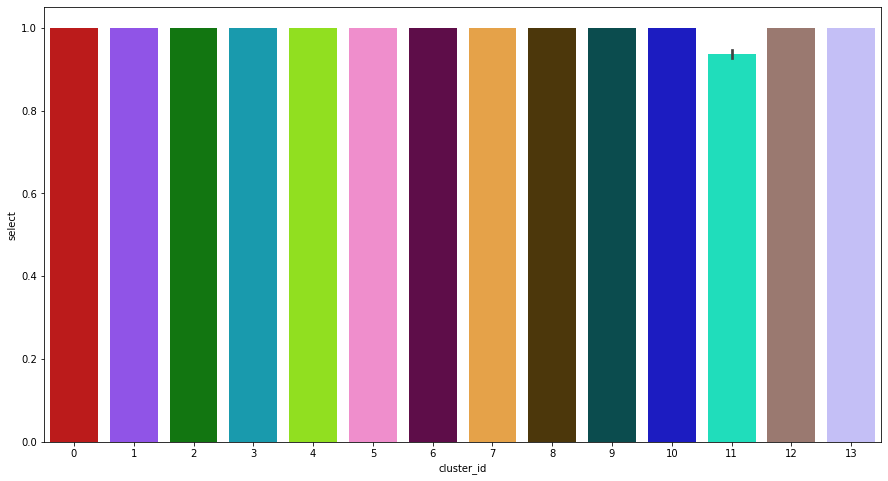

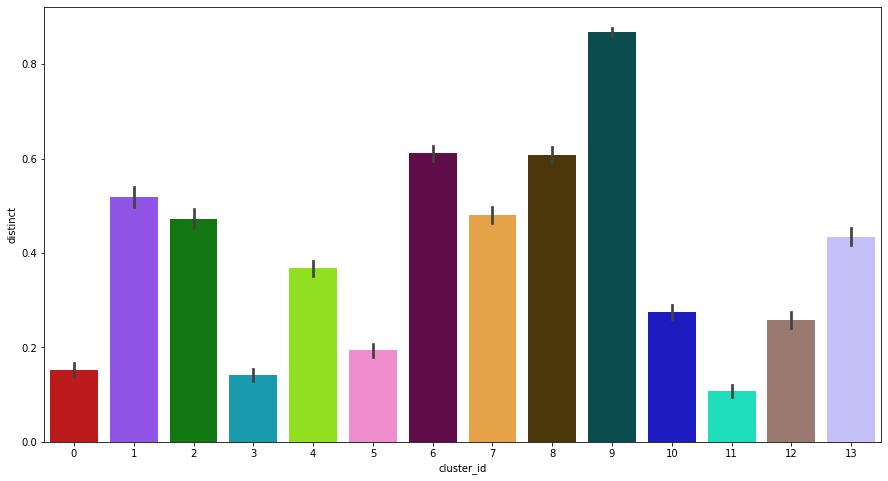

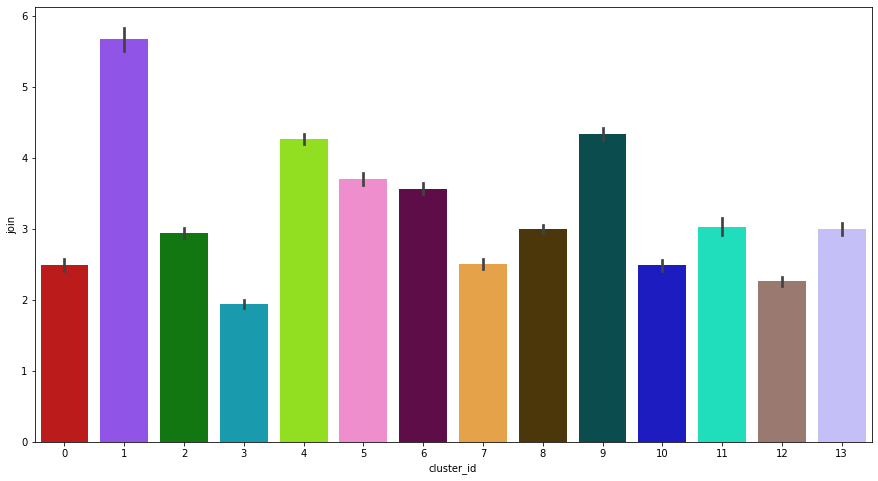

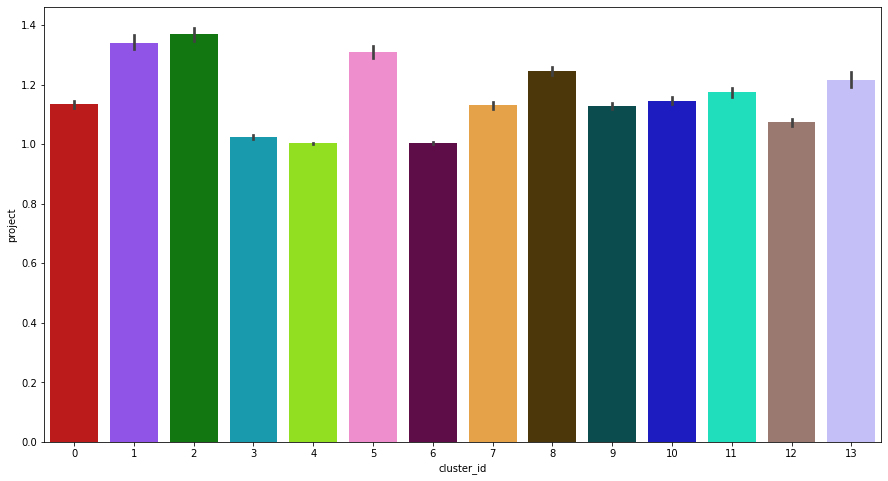

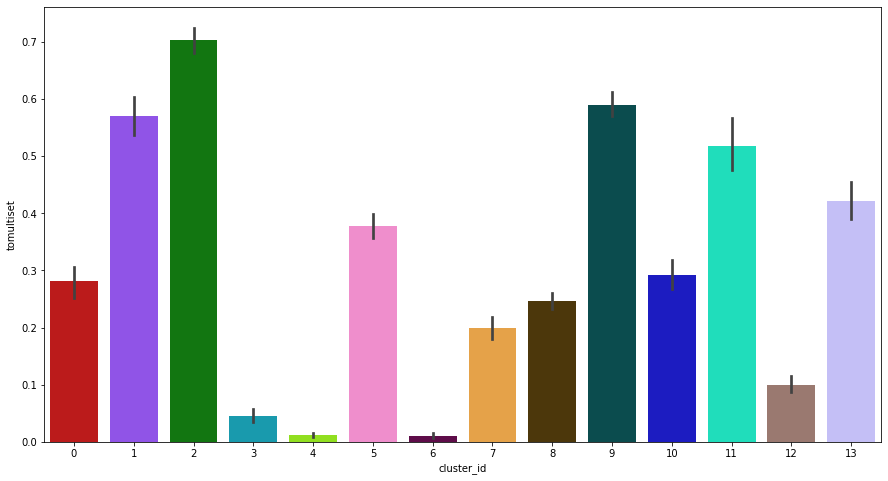

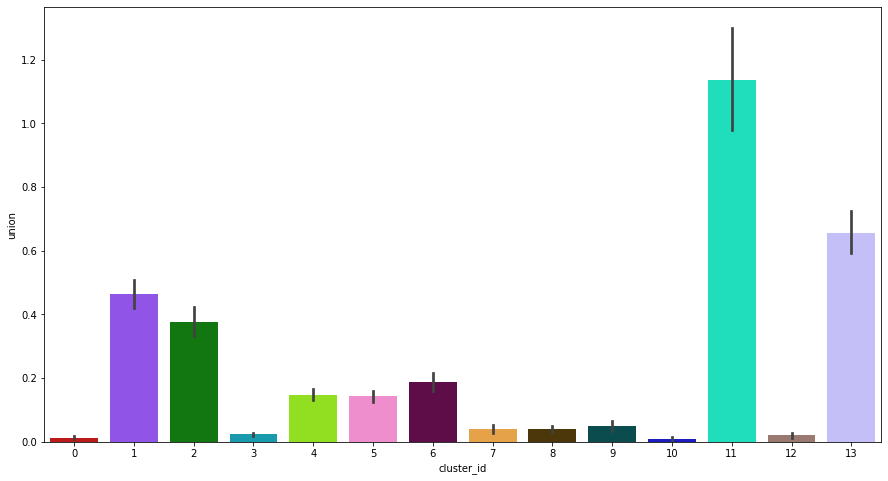

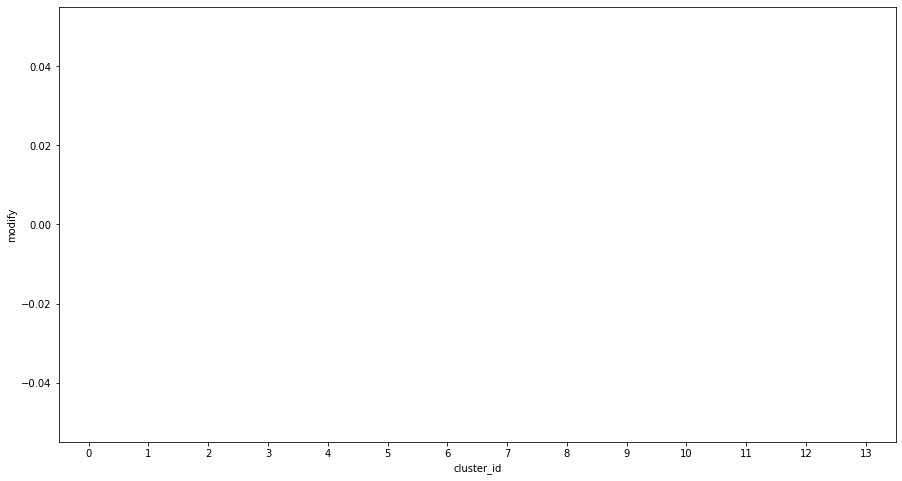

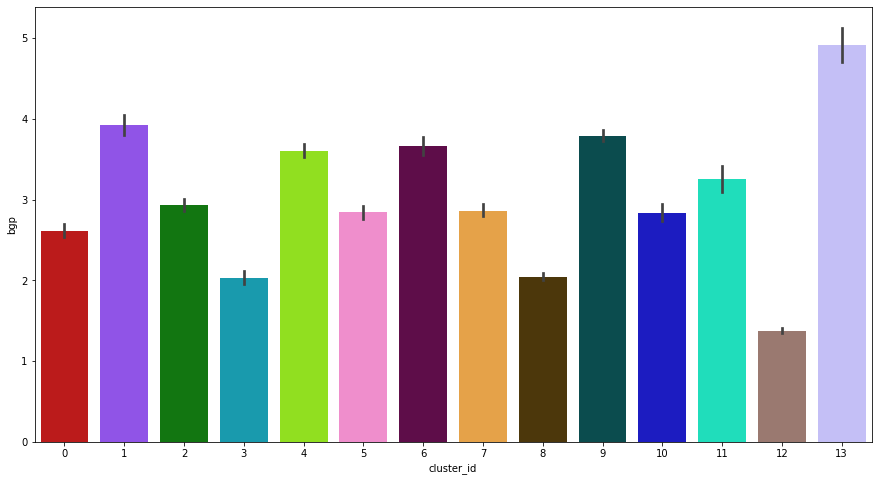

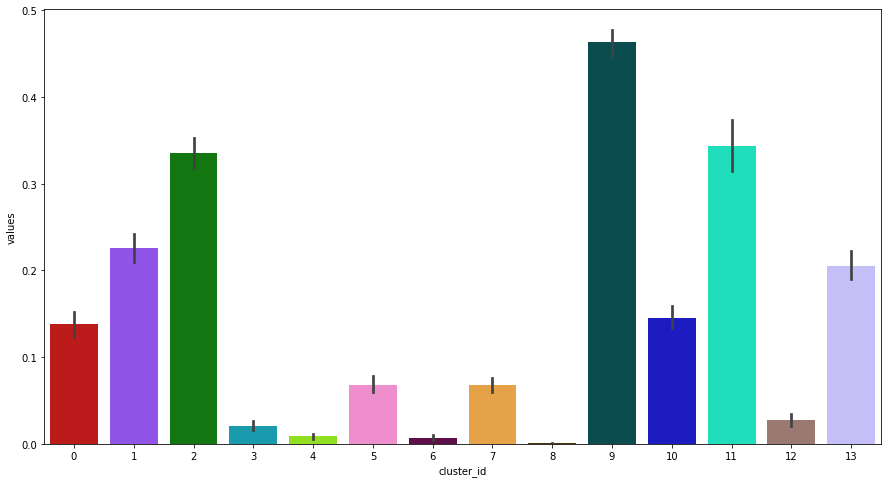

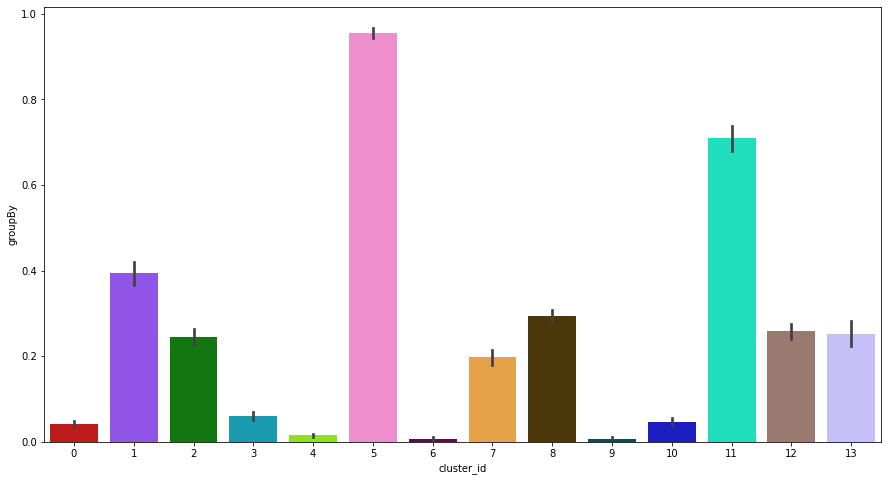

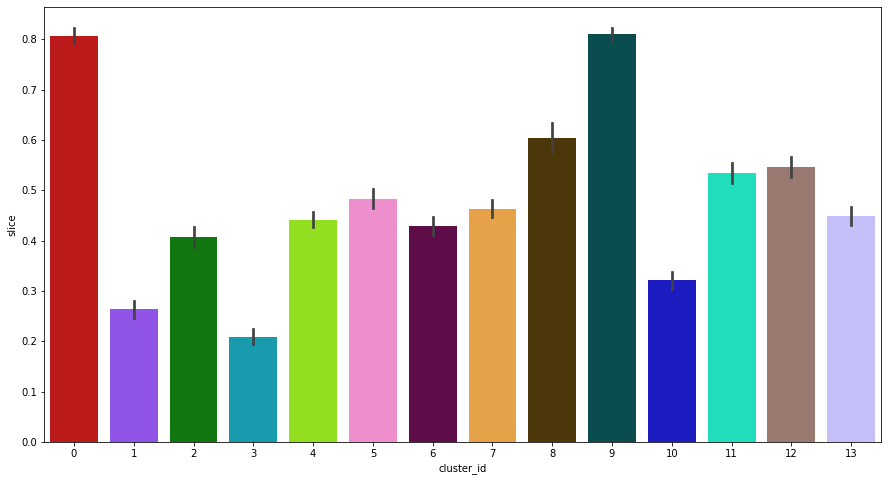

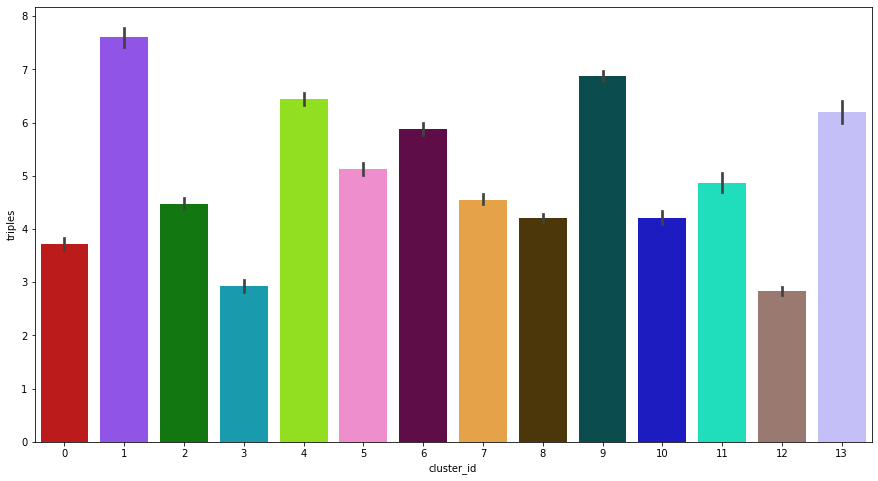

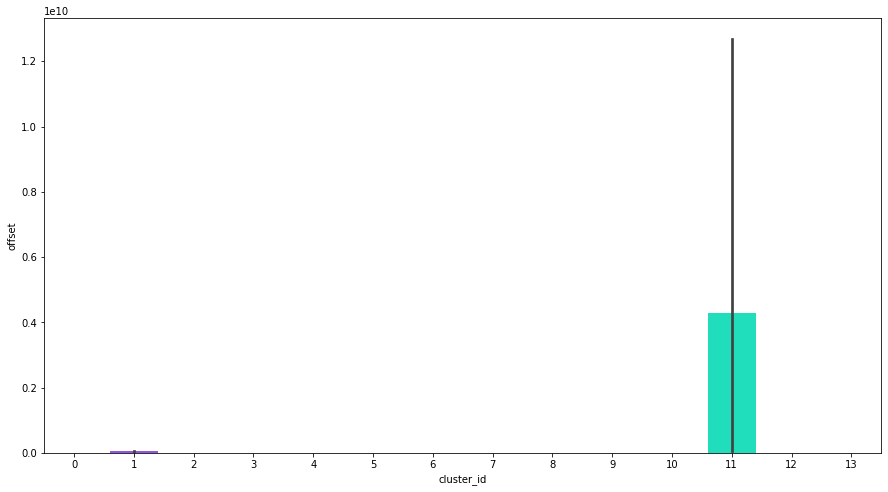

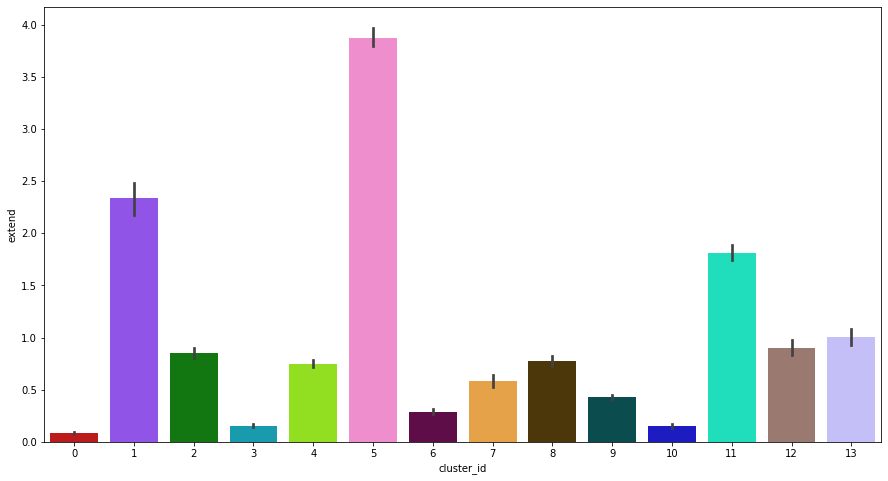

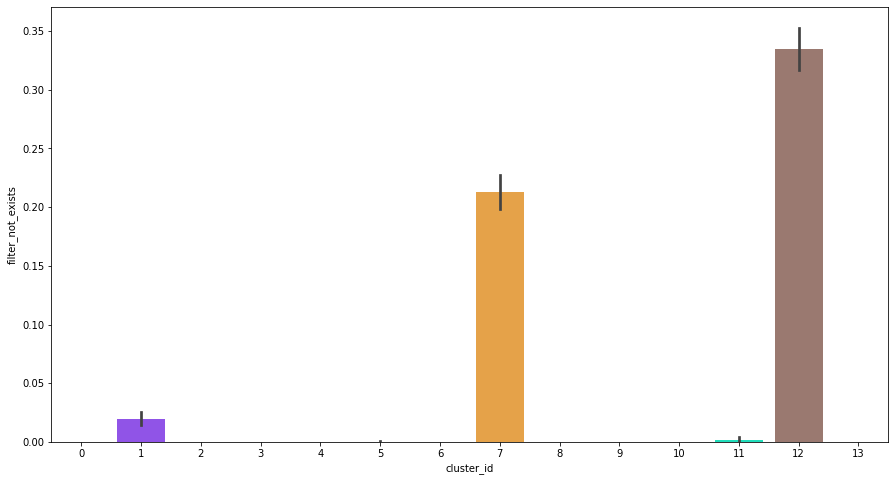

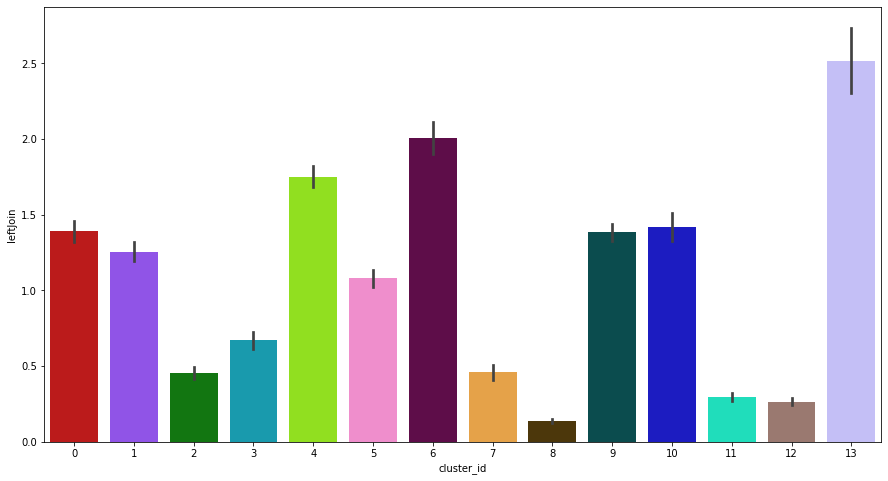

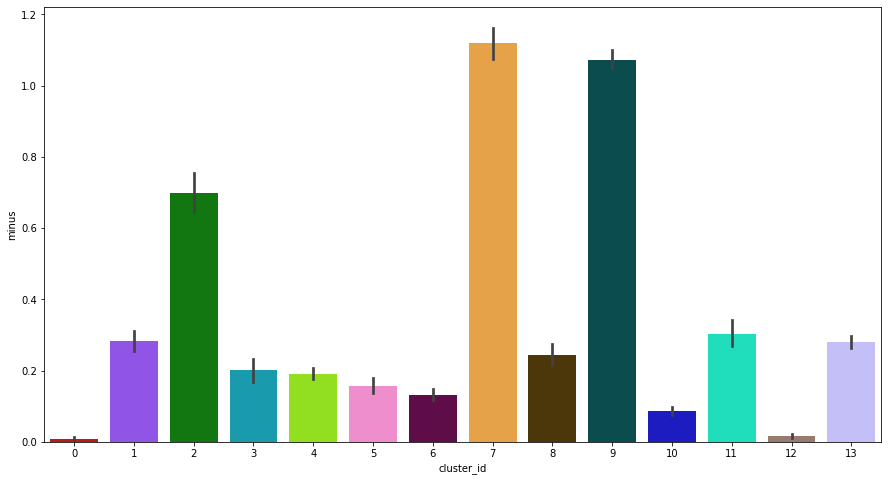

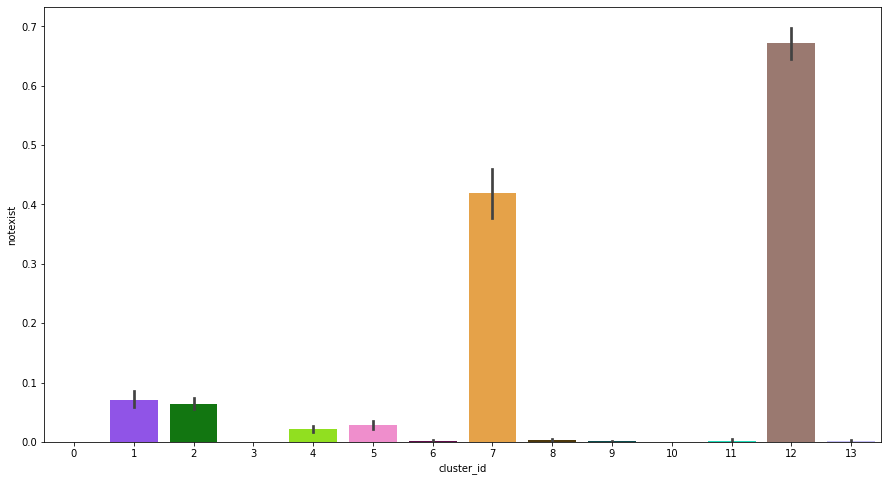

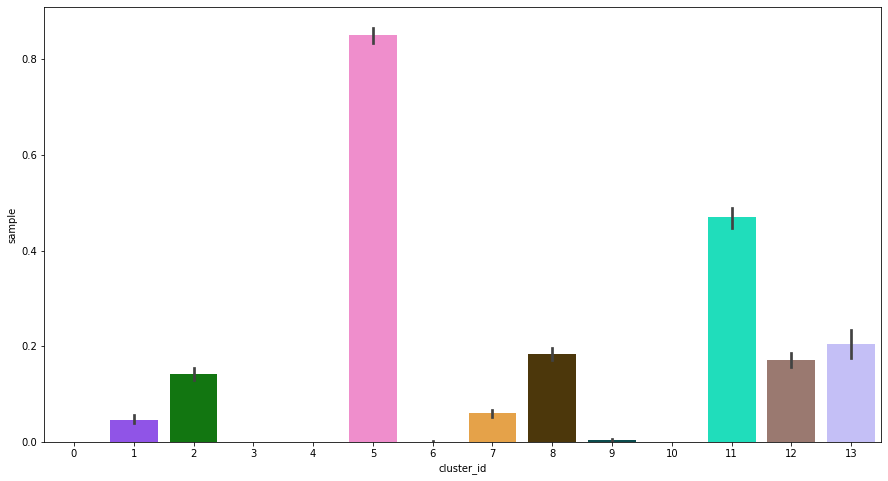

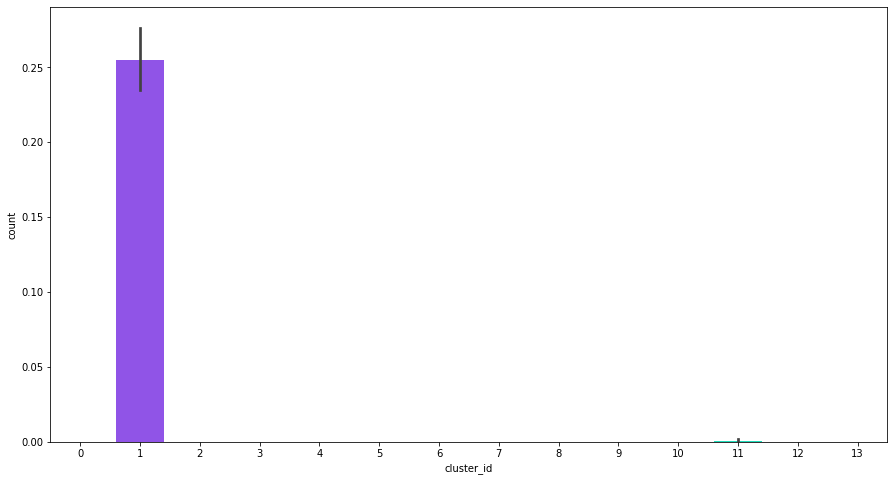

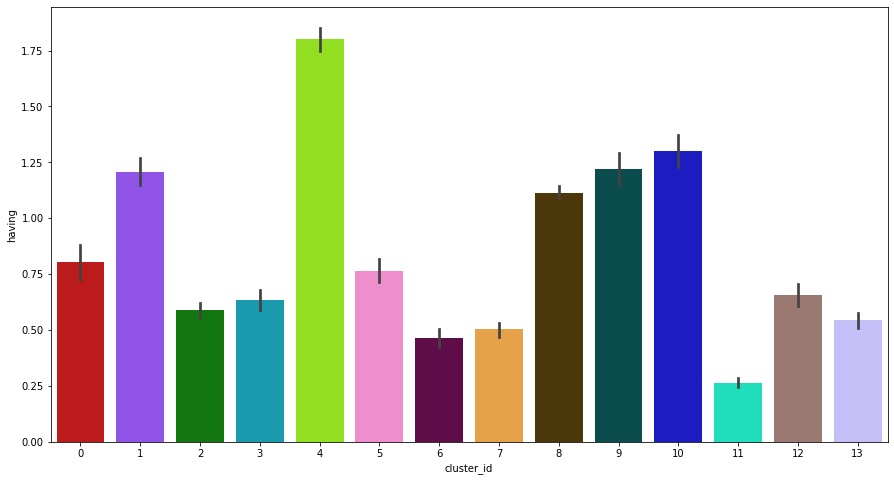

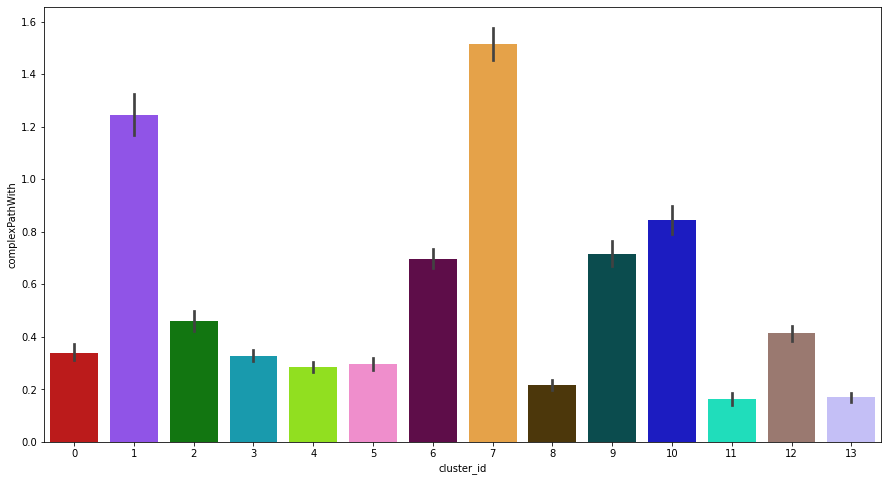

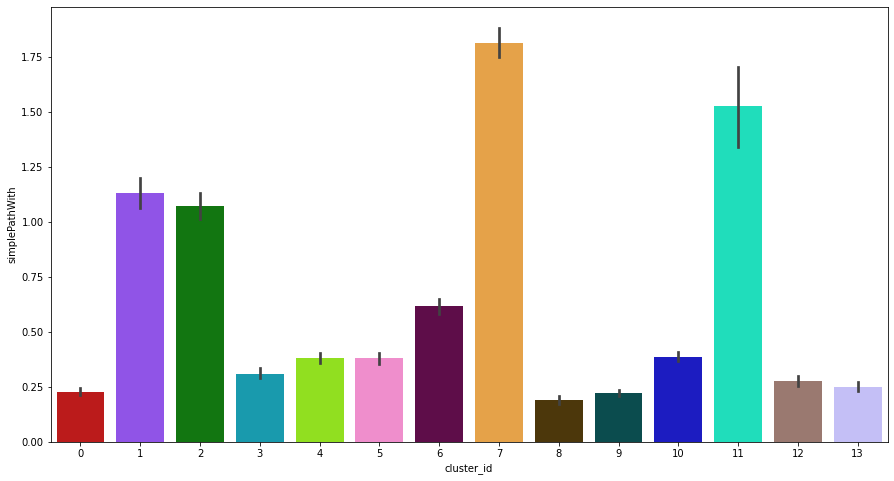

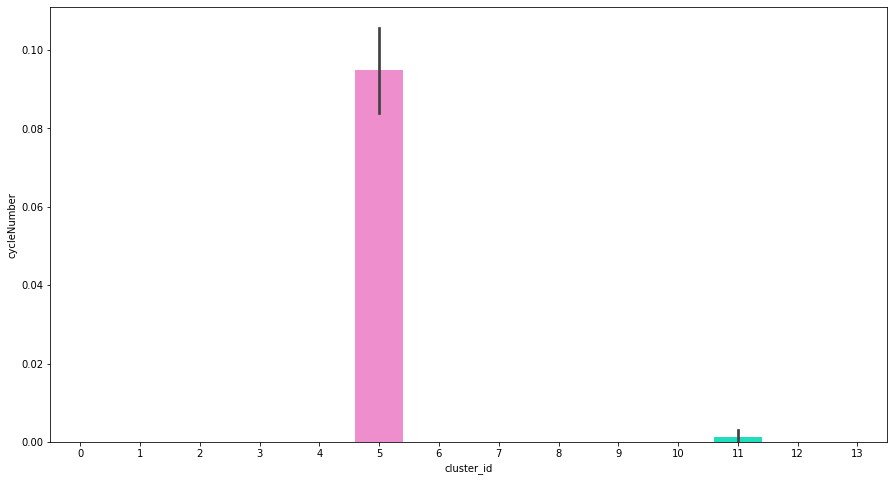

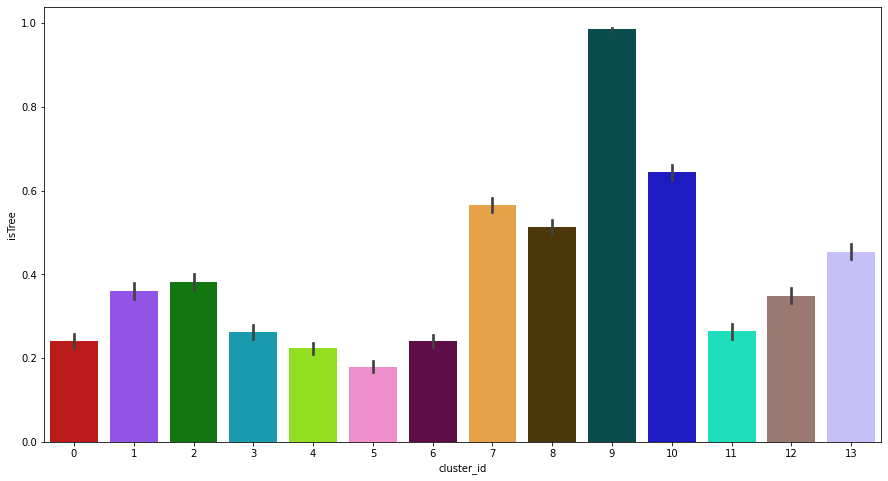

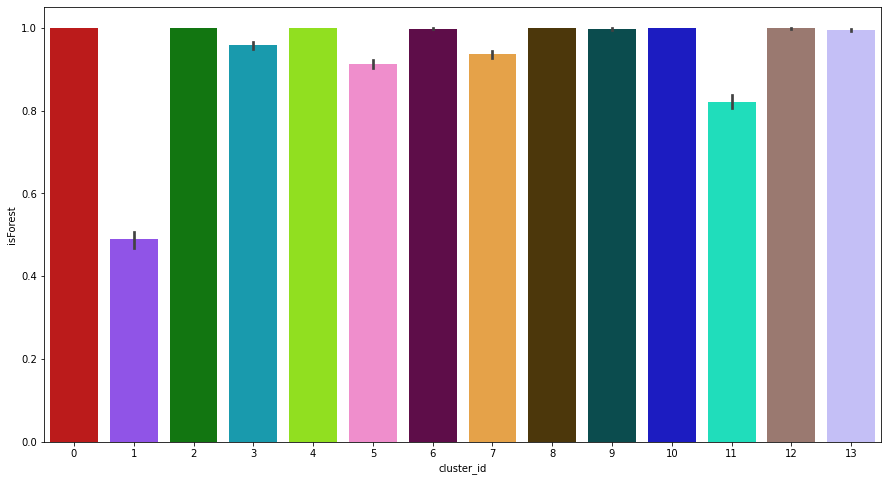

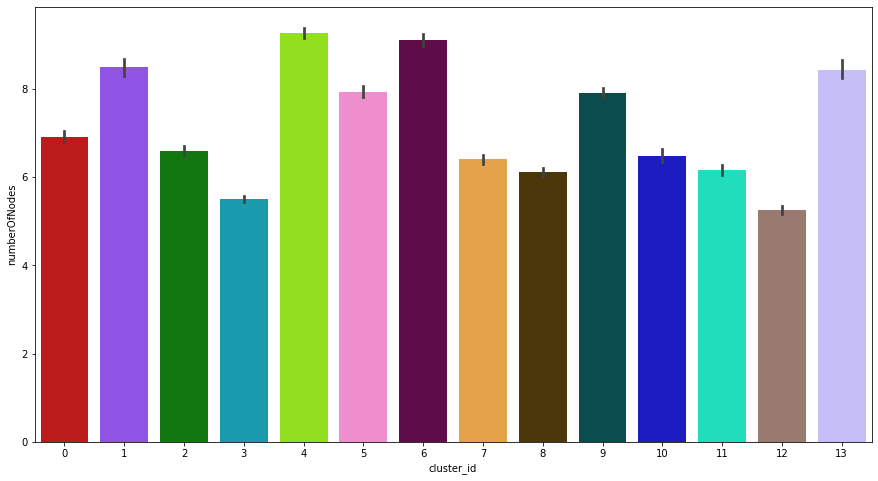

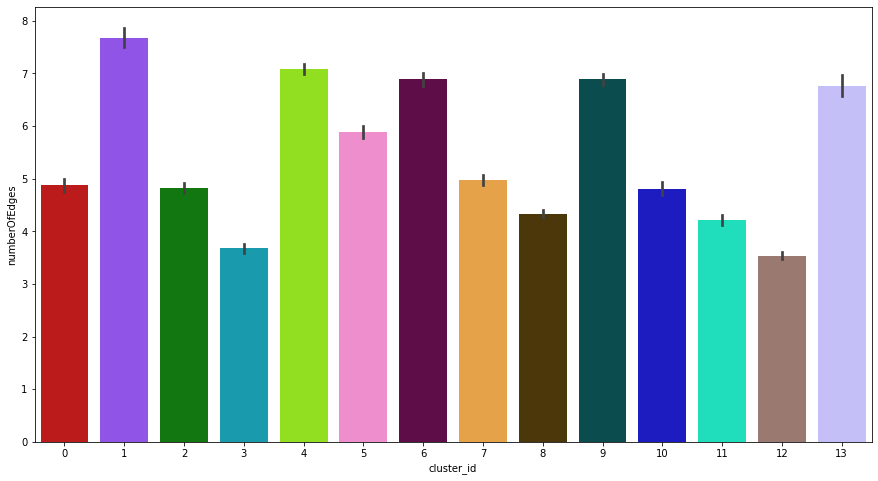

In [ ]:
for feature in features:
     plt.figure(figsize=(15,8))
#   #sns.boxplot(
     sns.barplot(
     x="cluster_id"
     , y=feature
     , data=df_sample_with_cluster
     , palette=palette
     #, whis=1000
     )
     plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=513ed372-d958-4618-b5dc-4b186f2555bd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>